# S2 Figure, bottom panel
A bar plot showing the proportion of TEs that were included in the evolutionary analysis in each nematode species

In [19]:
import pandas as pd

TEs = pd.read_table('TE_counts/family_counts.csv', index_col=0)

codes_in_final_data = \
['Rcul','Tspi','Ttri','Tmur','Ebre','Avit','Asuu','Bmal','Dimm','Lsig',
 'Lloa','Ovol','Smur','Wban','Bxyl','Gpal','Gros','Mchi','Mhap','Mflo',
 'Minc','Pred','Ptri','Pcof','Rsim','Spap','Srat','Sven','Hduj','Crem',
 'Cele','C11sp','briC','C5sp','Cang','Cjap','Cbre','Dviv','Hcon','Hbac',
 'Otip','Ppac',
]

te_superfams = []
for ind, row in TEs.iterrows():
    if '?' in ind or 'Unclassified' in ind or ind in ['DNA','LTR','LINE','SINE']:
        continue
    occurance = 0
    for sp in TEs:
        if row[sp] > 0:
            occurance +=1
    if occurance >= 15:
        te_superfams.append(ind)
len(te_superfams)

47

In [76]:
from reprophylo import *

# Load the Project with TE and RNAi data
pj = unpickle_pj('independent_contrasts/18S_tree_reprophylo_project_with_TE_style_and_RNAi', git=False)

# Ensure the metadata is on the trees
pj.propagate_metadata()

Bayes = pj.ft('18S@SINA@gappyout@dna_cat_gtr')

[Acan, Asim, Bpah, Btim, Ever, Sbat, Tcan] = [Bayes.search_nodes(keep=i)[0] for i in
                                            ['Acan', 'Asim', 'Bpah', 'Btim', 'Ever', 'Sbat', 'Tcan']]
for n in [Acan, Asim, Bpah, Btim, Ever, Sbat, Tcan]:
    n.delete()
    
alyr = Bayes.search_nodes(keep='Alyr')[0]
vcar = Bayes.search_nodes(keep='Vcar')[0]
hduj = Bayes.search_nodes(keep='Hduj')[0]
Bayes.set_outgroup(hduj)
R = Bayes.get_common_ancestor(alyr,vcar)
Bayes.dist = 0
Bayes.set_outgroup(R)
for n in Bayes.traverse():
    if not n.is_leaf():
        n.ladderize(0)
    
sps = []
    
# Get the species names that made it into the figure
for l in Bayes:
    if 'keep' in l.__dict__.keys():
        sps.append(l.keep)

returning tree object 18S@SINA@gappyout@dna_cat_gtr


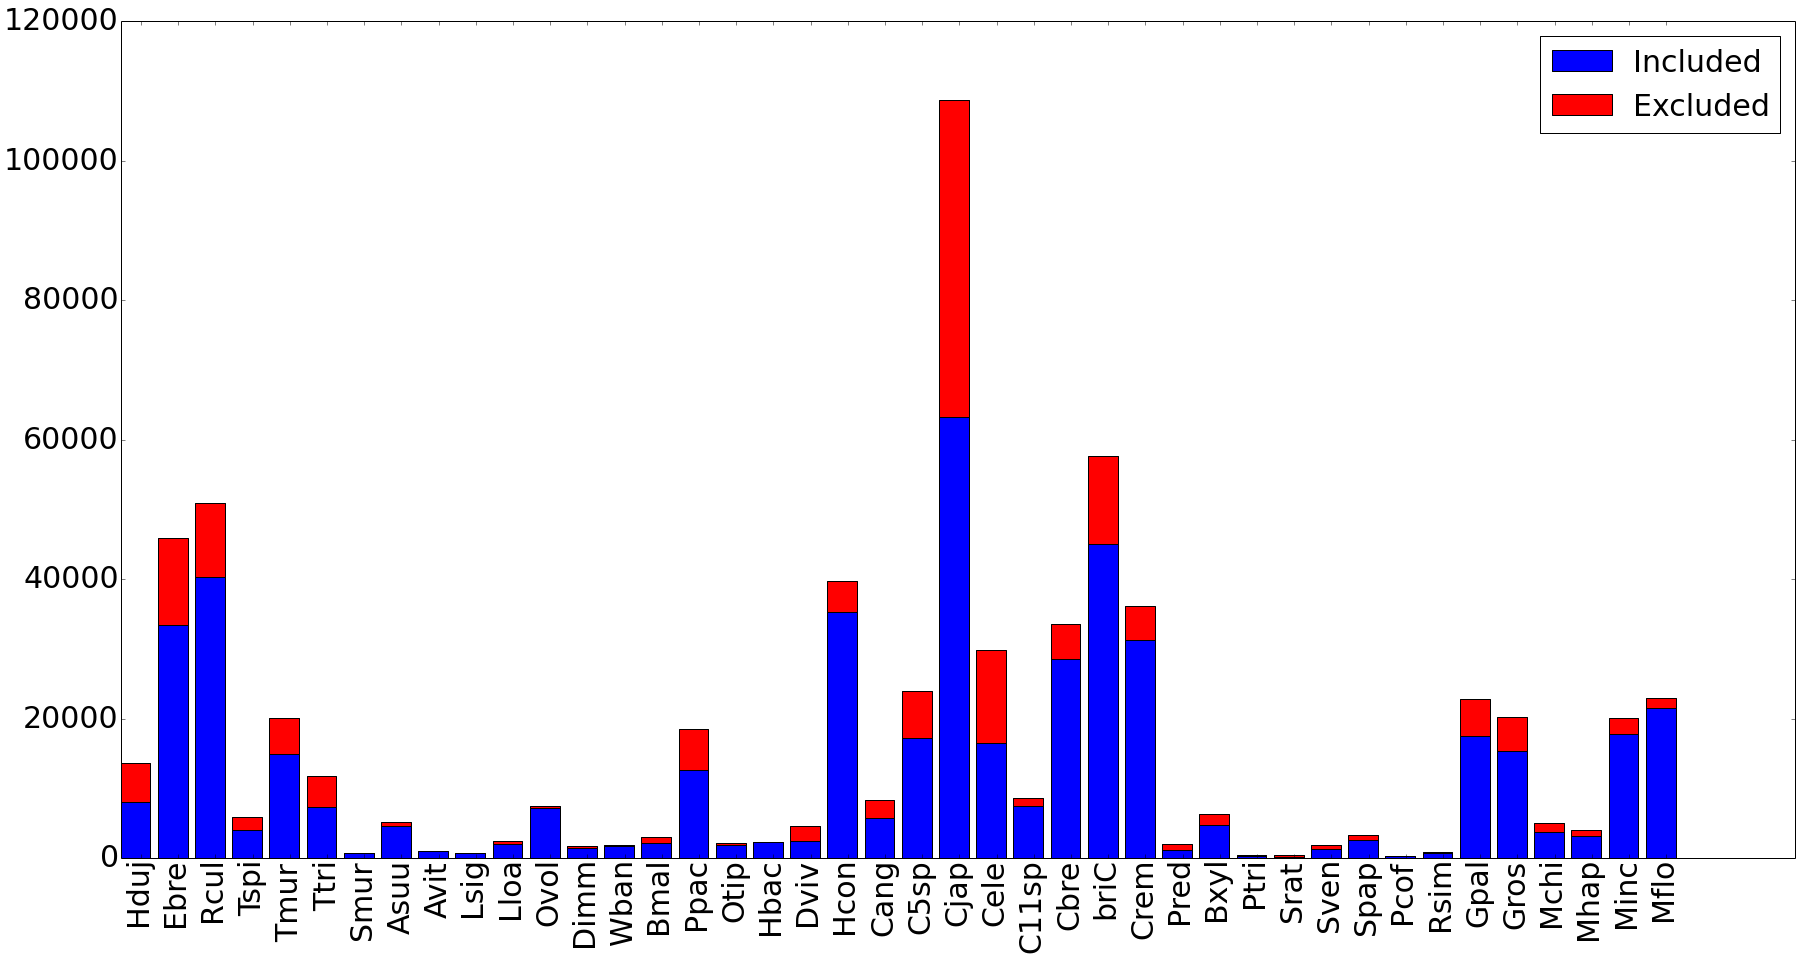

In [79]:
species = []
total = []
used = []
unused = []

for sp in sps:
    if not sp in codes_in_final_data:
        continue
    species.append(sp)
    total.append(sum(TEs[sp]))
    u = 0
    for te in te_superfams:
        u += TEs.at[te,sp]
    used.append(u)
    unused.append(sum(TEs[sp])-u)
    
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,15))
width = 1.1
ind = np.arange(len(species))
bars = ax.bar(ind, used)
bars[0].set_label('Included')
bars = ax.bar(ind, unused, bottom=used, color='red')
bars[0].set_label('Excluded')
ticks = plt.xticks(ind+width/2., species,  rotation=90)
ax.tick_params(labelsize=30)
plt.legend(fontsize=30)
fig.savefig('TE_counts/used_elements_figure_no_wtsi.png')

# S1 Results - section 1
The composition of the non-redundant repeat library that was used in the RepeatMasker searches (`Library/Nematoda.lib`).

In [93]:
# Count the superfamilies in each nematode species. We expect closely related species with similar TE content
# to have different concensus sequences because the library is non-redundant.

from Bio import SeqIO

records = SeqIO.parse('Library/Nematoda.lib','fasta')

lib = {}
for r in records:
    code = r.id.split('_')[0]
    fam = r.id.split('#')[-1]
    try:
        lib[code][fam] += 1
    except:
        try:
            lib[code][fam] = 1
        except:
            lib[code] = {fam: 1}
            
lib

{'Acan': {'DNA/CMC-EnSpm': 17,
  'DNA/MULE-MuDR': 1,
  'DNA/PIF-Harbinger': 2,
  'DNA/PiggyBac': 14,
  'DNA/TcMar-Ant1': 1,
  'DNA/TcMar-Mariner': 36,
  'DNA/TcMar-Tc1': 3,
  'LINE/L1': 1,
  'LINE/L1-Tx1': 1,
  'LINE/L2': 1,
  'LINE/Penelope': 16,
  'LINE/R1': 1,
  'LINE/RTE': 1,
  'LINE/RTE-RTE': 22,
  'LINE/RTE-X': 1,
  'LINE/Tad1': 1,
  'LTR': 1,
  'LTR/Copia': 3,
  'LTR/Gypsy': 11,
  'LTR/Pao': 26,
  'SINE/Alu': 1,
  'SINE/tRNA': 5,
  'SINE?': 16,
  'SINE?/RTE': 2,
  'Satellite': 1,
  'Simple_repeat': 5,
  'Unknown': 486,
  'buffer': 1,
  'rRNA': 2,
  'snRNA': 3},
 'Asim': {'DNA': 3,
  'DNA/CMC-Chapaev-3': 1,
  'DNA/CMC-EnSpm': 1,
  'DNA/Ginger': 1,
  'DNA/MULE-MuDR': 1,
  'DNA/Merlin': 2,
  'DNA/PiggyBac': 1,
  'DNA/TcMar-Mariner': 2,
  'DNA/TcMar-Tc1': 1,
  'DNA/TcMar-Tc4': 1,
  'DNA/TcMar-Tigger': 4,
  'DNA/hAT': 1,
  'DNA/hAT-Ac': 2,
  'DNA/hAT-Charlie': 6,
  'DNA/hAT-hATx': 3,
  'LINE/CR1': 8,
  'LINE/DRE': 1,
  'LINE/L1': 1,
  'LINE/L2': 2,
  'LINE/Penelope': 3,
  'LINE/R1': 

plot the bar charts

In [6]:
from reprophylo import *

# Load the Project with TE and RNAi data
pj = unpickle_pj('independent_contrasts/18S_tree_reprophylo_project_with_TE_style_and_RNAi', git=False)

# Ensure the metadata is on the trees
pj.propagate_metadata()

Bayes = pj.ft('18S@SINA@gappyout@dna_cat_gtr')

[Acan, Asim, Bpah, Btim, Ever, Sbat, Tcan] = [Bayes.search_nodes(keep=i)[0] for i in
                                            ['Acan', 'Asim', 'Bpah', 'Btim', 'Ever', 'Sbat', 'Tcan']]
for n in [Acan, Asim, Bpah, Btim, Ever, Sbat, Tcan]:
    n.delete()
    
alyr = Bayes.search_nodes(keep='Alyr')[0]
vcar = Bayes.search_nodes(keep='Vcar')[0]
hduj = Bayes.search_nodes(keep='Hduj')[0]
Bayes.set_outgroup(hduj)
R = Bayes.get_common_ancestor(alyr,vcar)
Bayes.dist = 0
Bayes.set_outgroup(R)
for n in Bayes.traverse():
    if not n.is_leaf():
        n.ladderize(0)
    
sps = []
    
# Get the species names that made it into the figure
for l in Bayes:
    if 'keep' in l.__dict__.keys():
        sps.append([l.keep,l.source_organism])

DEBUG:Cloud:Log file (/home/amir/.picloud/cloud.log) opened


returning tree object 18S@SINA@gappyout@dna_cat_gtr


In [29]:
import numpy as np
import matplotlib.pyplot as plt

from itertools import chain


i = 0
for species in sps:

    sp = species[0]
    title = species[1]
    
    if not sp in lib:
        continue

    items = sorted(lib[sp].items())
    
    
    Unknown = 0
    tes = []
    counts = []
    colors = []
    for te, count in items:
        if te == 'Unknown':
            Unknown = count
            continue
        tes.append(te)
        counts.append(count)
        if 'DNA' in te:
            colors.append('red')
        elif 'LTR' in te:
            colors.append('green')
        elif 'LINE' in te:
            colors.append('blue')
        elif 'SINE' in te:
            colors.append('gray')
        else:
            colors.append('silver')
        
    fig, ax = plt.subplots(figsize=(30,15))
    width = 1.1
    ind = np.arange(len(tes))
    bars = ax.bar(ind, counts)
    for bar in bars:
        bar.set_color(colors.pop(0))
    ticks = plt.xticks(ind+width/2., tes,  rotation=90)
    ax.tick_params(labelsize=30)
    plt.title("%s, Unknown %i"%(title,Unknown), fontsize=50)
    plt.xlim([0,len(ind)+width/2+1])
    fig.savefig('Library/%i_%s.png'%(i, sp), bbox_inches='tight')
    i += 1

In [13]:
plt.close('all')